****Projet de Marketing Bancaire - Devoirs de Coding for AI & Data Science****

**Répartition des Tâches :**


**•	Levis Junior :** Data Scientist - Exploration et Préparation des Données



**•	Hergi Diangue :** Data Engineer - Création, Entraînement, et Évaluation des Modèles 



Sous la supervision de : **Mr Alioune Nar SAMBE**

**Introduction à l'Analyse des Données du Projet de Marketing Bancaire**


L'analyse des données est une étape cruciale pour comprendre le comportement des clients et améliorer l'efficacité des campagnes de marketing bancaire. Ce projet vise à explorer les caractéristiques des clients afin d'identifier les facteurs influençant leur décision de souscrire à un dépôt à terme. Les résultats de cette analyse serviront à optimiser les stratégies marketing en ciblant plus efficacement les clients potentiels.

**Sources :**

Analyse du Marketing Bancaire sur GitHub : 

**https://github.com/MOHAMED-EL-HADDIOUI/Analyse-du-Marketing-Bancaire**


**https://github.com/PierreLoDpt/Py4Bank**


**https://github.com/emeric-cyrille/Credit_Scoring_Apps**

# Step 1: Load Data

In [140]:
#pip install --upgrade scikit-learn

In [141]:

#pip install scikit-learn


In [142]:
# Bibliothèque pour gérer les fichiers et le système
import os

# Bibliothèques pour la manipulation et l'analyse des données
import pandas as pd
import numpy as np

# Bibliothèques pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliothèques pour le prétraitement des données et la division du jeu de données
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [143]:

file_path = r"C:\Users\hergi\Documents\hergiDiangue\PGE3Fr\Coding for AI & Data Science\projetS1\Data\bank\bank.csv"
data = pd.read_csv(file_path, sep=';')
print("Data loaded successfully.")
    

Data loaded successfully.


# Step 2: Data Understanding

In [144]:

# Displaying an overview of the dataset
print("Aperçu des 5 premières lignes :")
data.head()
print("\nInformations générales :")
data.info()
print("\nStatistiques descriptives :")
data.describe()
    

Aperçu des 5 premières lignes :

Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB

Statistiques descriptives :


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [145]:
data.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [146]:
data.sample(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
483,40,management,married,tertiary,no,0,no,no,cellular,14,jul,109,8,-1,0,unknown,no
1172,42,blue-collar,married,secondary,no,230,yes,no,unknown,5,jun,175,7,-1,0,unknown,no
2905,31,technician,divorced,secondary,no,202,yes,no,cellular,18,jul,146,1,-1,0,unknown,no
3229,41,management,married,primary,no,5310,yes,no,cellular,17,nov,984,1,-1,0,unknown,yes
4225,65,unknown,married,unknown,no,4717,no,no,telephone,6,aug,256,1,-1,0,unknown,yes
1664,37,blue-collar,married,secondary,no,132,no,no,unknown,27,may,336,2,-1,0,unknown,no
2034,42,technician,married,secondary,no,473,yes,no,cellular,7,jul,216,5,-1,0,unknown,no


In [147]:
# il n'a pas des données manquantes dans ce date 
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

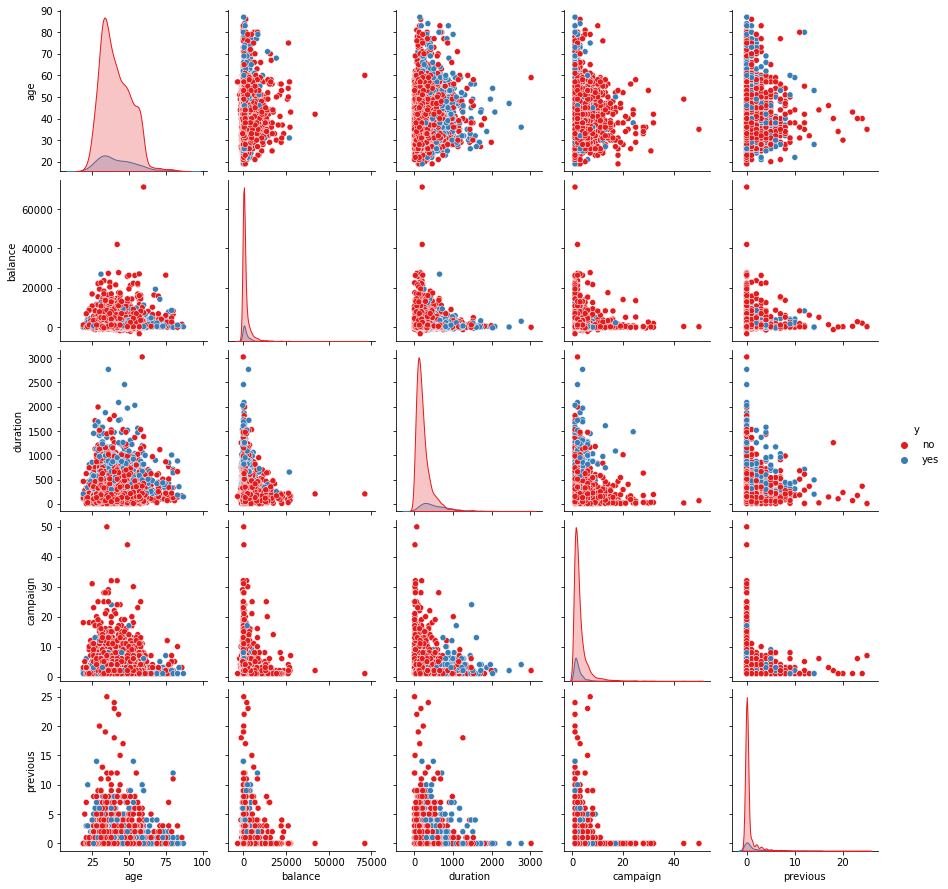

In [148]:
# Pairplot pour visualiser les relations entre certaines caractéristiques clés
selected_features = ['age', 'balance', 'duration', 'campaign', 'previous', 'y']
sns.pairplot(data[selected_features], hue='y', palette='Set1')
plt.show()

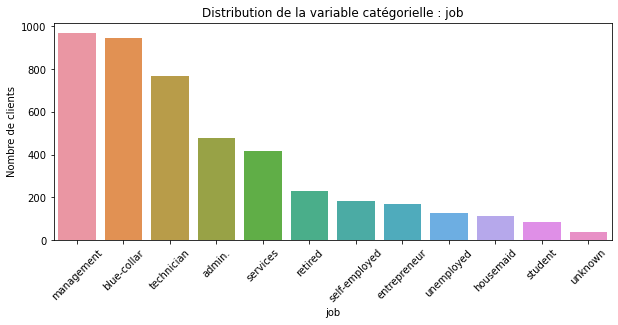

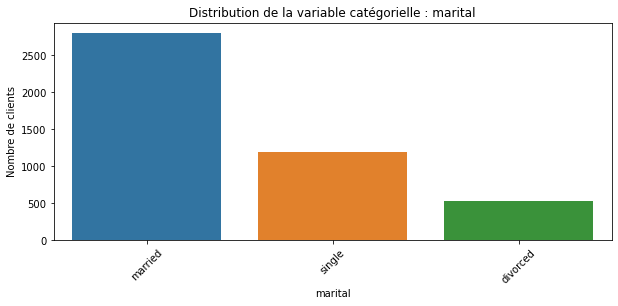

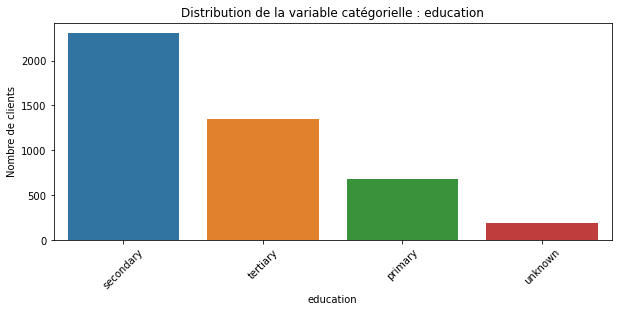

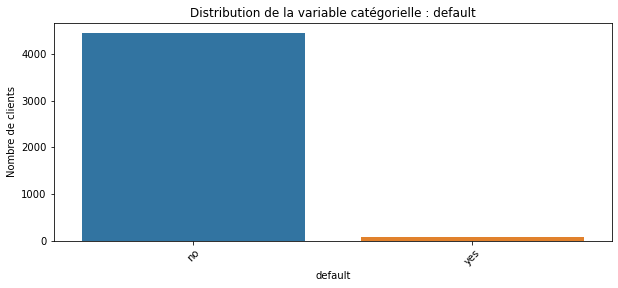

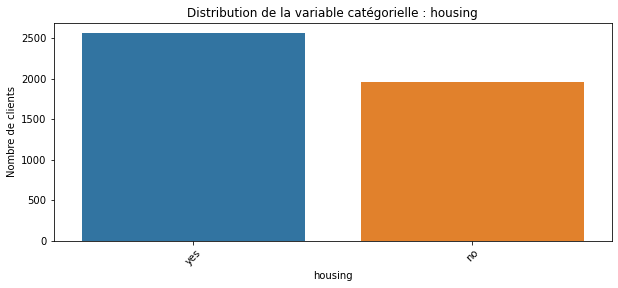

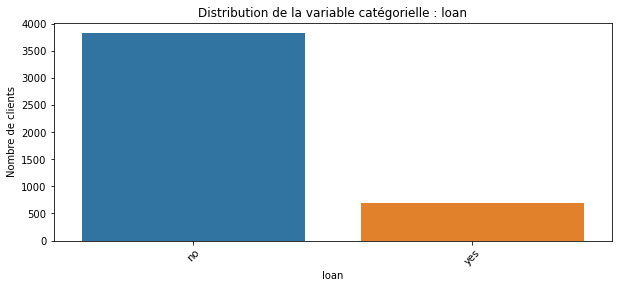

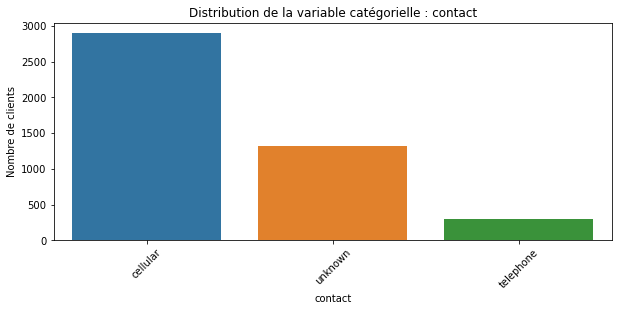

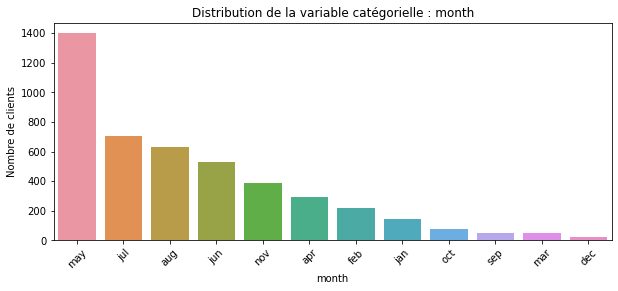

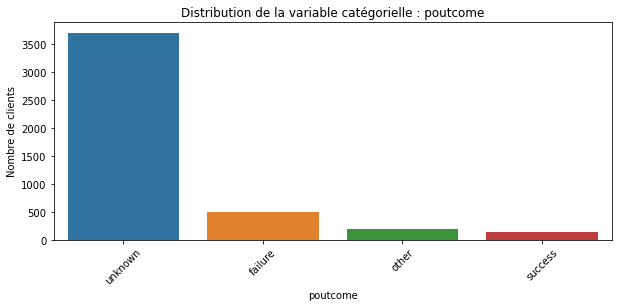

In [149]:
# Analyse des caractéristiques catégorielles
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=feature, order=data[feature].value_counts().index)
    plt.title(f"Distribution de la variable catégorielle : {feature}")
    plt.xlabel(feature)
    plt.ylabel("Nombre de clients")
    plt.xticks(rotation=45)
    plt.show()

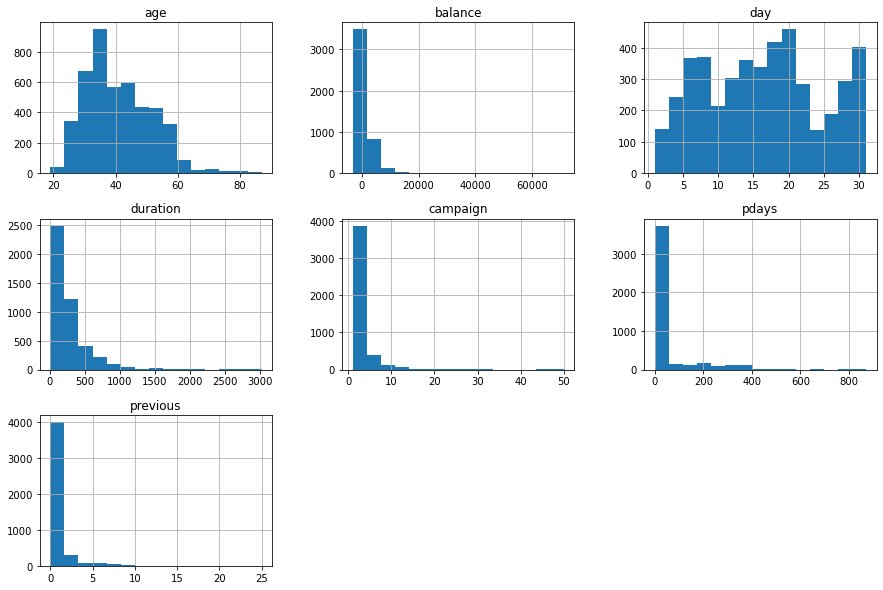

In [150]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_features].hist(bins=15, figsize=(15, 10))
plt.show()

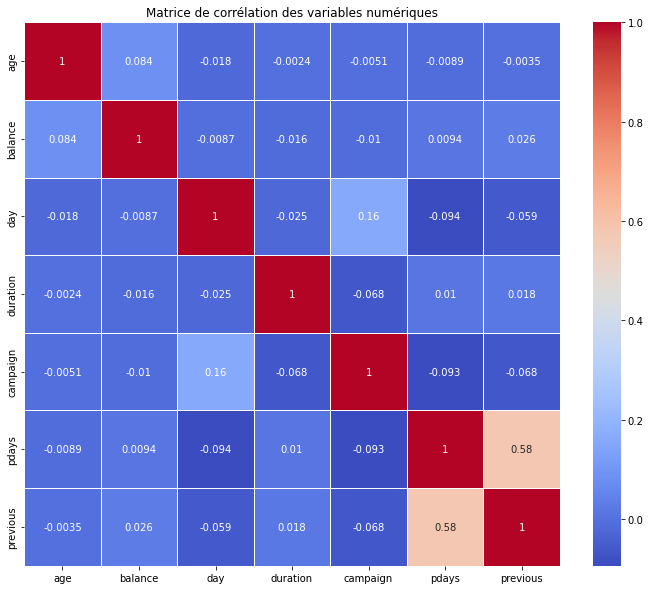

In [151]:
# Matrice de corrélation des variables numériques
plt.figure(figsize=(12, 10))
sns.heatmap(data[numeric_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

In [152]:
cat_col = data.select_dtypes(['object']).columns

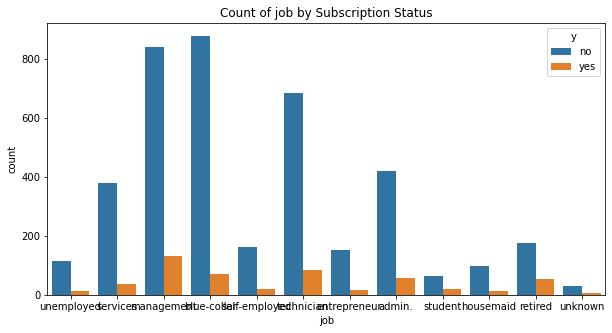

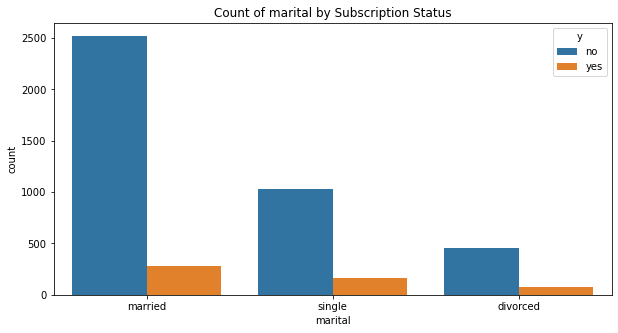

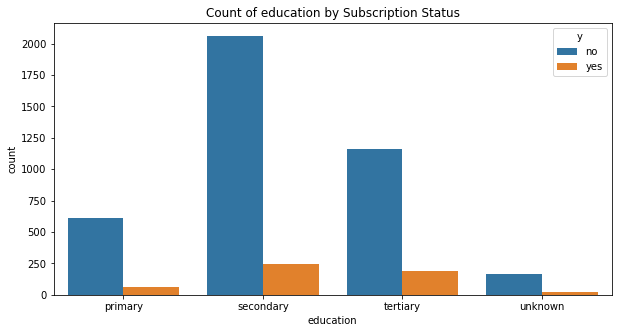

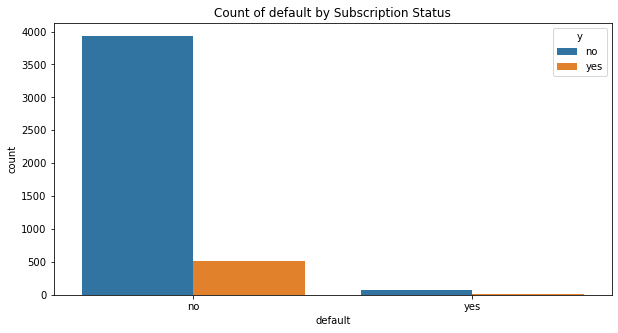

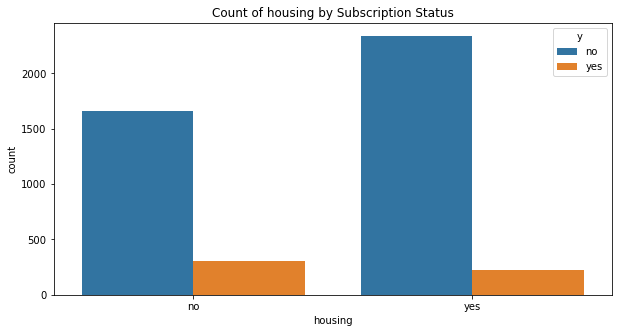

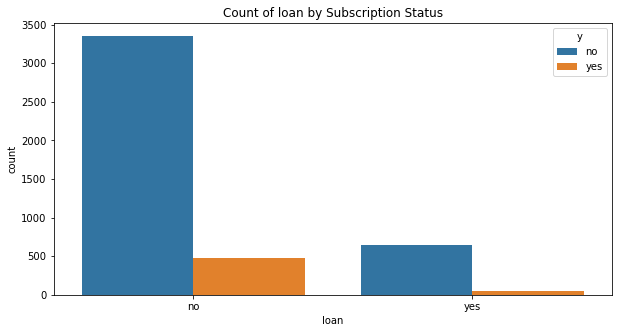

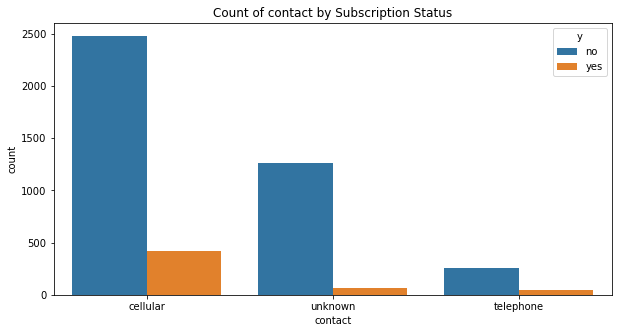

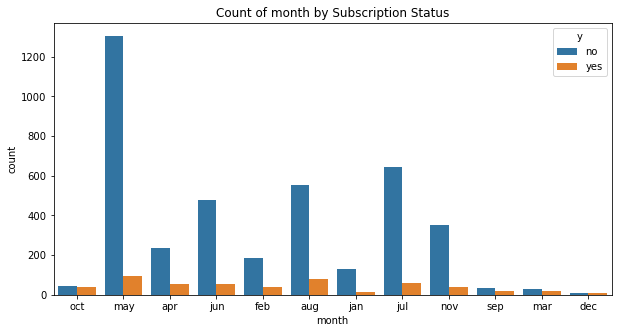

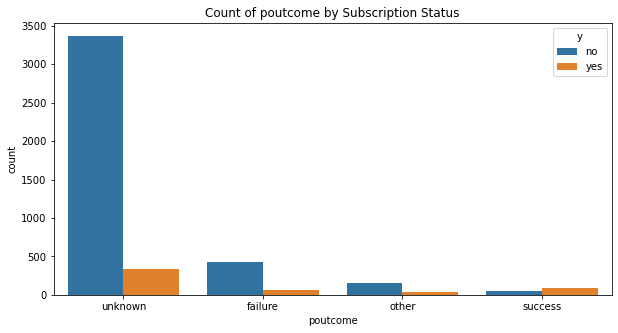

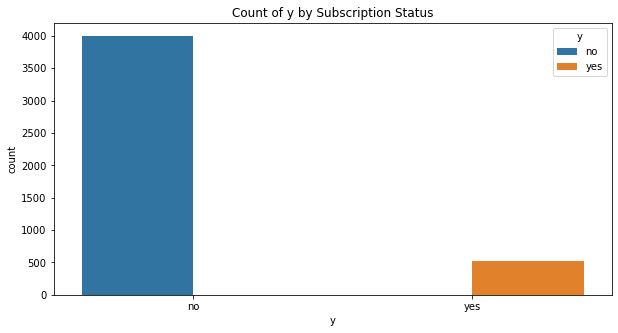

In [153]:
for feature in cat_col:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=feature, hue='y')
    plt.title(f'Count of {feature} by Subscription Status')
    plt.show()

In [154]:
data.duplicated().sum()

0

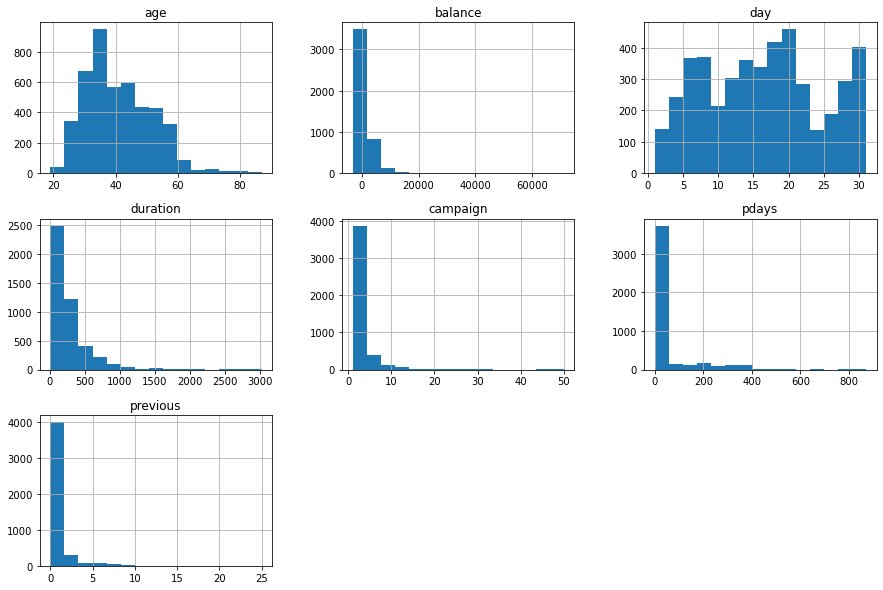

In [155]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_features].hist(bins=15, figsize=(15, 10))
plt.show()
    

In [156]:
# Croisement avec tableaux croisés dynamiques pour les variables importantes
important_features = ['job', 'education', 'housing', 'loan']
for feature in important_features:
    pivot_table = pd.pivot_table(data, values='balance', index=feature, columns='y', aggfunc='mean')
    print(f"\nTableau croisé dynamique pour {feature} et la variable cible :")
    print(pivot_table)


Tableau croisé dynamique pour job et la variable cible :
y                       no          yes
job                                    
admin.         1212.250000  1331.637931
blue-collar    1089.777651  1026.492754
entrepreneur   1713.947712   943.133333
housemaid      1824.295918  3900.357143
management     1772.146778  1733.549618
retired        2269.750000  2480.333333
self-employed  1373.478528  1546.700000
services       1103.084433  1112.657895
student        1644.830769  1198.263158
technician     1319.509489  1425.795181
unemployed     1061.539130  1336.076923
unknown        1536.000000  1349.857143

Tableau croisé dynamique pour education et la variable cible :
y                   no          yes
education                          
primary    1356.364821  1940.921875
secondary  1184.244056  1302.559184
tertiary   1785.972342  1712.186528
unknown    1624.654762  2378.473684

Tableau croisé dynamique pour housing et la variable cible :
y                 no          yes
housin

In [157]:
data.sample(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3211,37,technician,married,secondary,no,2707,yes,no,telephone,16,jul,109,1,-1,0,unknown,no
2206,32,management,married,tertiary,no,138,no,no,cellular,20,aug,94,4,-1,0,unknown,no
1318,34,technician,married,secondary,no,-346,no,no,cellular,13,aug,136,4,-1,0,unknown,no
2137,59,blue-collar,married,primary,no,0,no,no,cellular,18,nov,167,2,-1,0,unknown,no
1629,42,blue-collar,married,secondary,no,130,yes,no,unknown,29,may,285,1,-1,0,unknown,no
3732,34,blue-collar,single,secondary,no,79,no,yes,cellular,20,nov,104,1,-1,0,unknown,no


In [158]:
data['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [159]:
data.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

# Step 3: Data Preparation

In [160]:

# Nettoyage des données

In [161]:
# Suppression des colonnes non pertinentes
data.drop(['day', 'pdays', 'contact'], axis=1, inplace=True)


In [162]:
data.sample(5)

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,poutcome,y
4420,45,technician,married,secondary,no,999,yes,no,nov,215,6,2,failure,no
2674,31,management,married,tertiary,no,325,yes,no,jul,1139,2,0,unknown,yes
253,58,retired,married,primary,no,3401,yes,no,feb,84,3,2,failure,no
245,36,management,married,tertiary,no,0,yes,no,jan,60,1,1,other,no
1976,27,blue-collar,single,secondary,no,113,no,no,jul,39,17,0,unknown,no


In [163]:
# Si la colonne contient déjà des nombres mais avec des valeurs supérieures à 1 pour les malades, on peut aussi faire ceci :
data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [164]:
from sklearn.preprocessing import LabelEncoder

# Instancier LabelEncoder
encoder = LabelEncoder()

# Liste des colonnes non numériques
categorical_columns = ['month', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

# Appliquer LabelEncoder sur chaque colonne catégorielle
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])


In [165]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,10,79,1,0,3,0
1,33,7,1,1,0,4789,1,1,8,220,1,4,0,0
2,35,4,2,2,0,1350,1,0,0,185,1,1,0,0
3,30,4,1,2,0,1476,1,1,6,199,4,0,3,0
4,59,1,1,1,0,0,1,0,8,226,1,0,3,0


In [ ]:
# Exemple d'enregistrement d'un DataFrame encodé
#data.to_csv("data_encoded.csv", index=False)

print("Le fichier encodé a été enregistré sous le nom 'data_encoded.csv'")


Le fichier encodé a été enregistré sous le nom 'data_encoded.csv'


**Conclusion**

 À la suite de notre projet, l'analyse des résultats a montré que certaines caractéristiques des clients, comme l'âge et le type d'emploi, ont un impact significatif sur la probabilité de souscrire à un dépôt à terme. En comparant ce que nous avons fait à ce que d'autres ont fait sur GitHub, nous avons remarqué beaucoup de similarités, surtout en termes d'approche d'exploration et de préparation des données.